In [1]:
!pip install qiskit

In [2]:
import networkx as nx
import numpy as np
import matplotlib as mpl
import plotly.graph_objects as go
from qiskit import Aer
from matplotlib import pyplot as plt
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_city
from qiskit.algorithms.optimizers import COBYLA, SLSQP, ADAM


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13944\4191334811.py:9: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA, SLSQP, ADAM


In [4]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


C:\Users\ADMIN\Conda Distribution\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


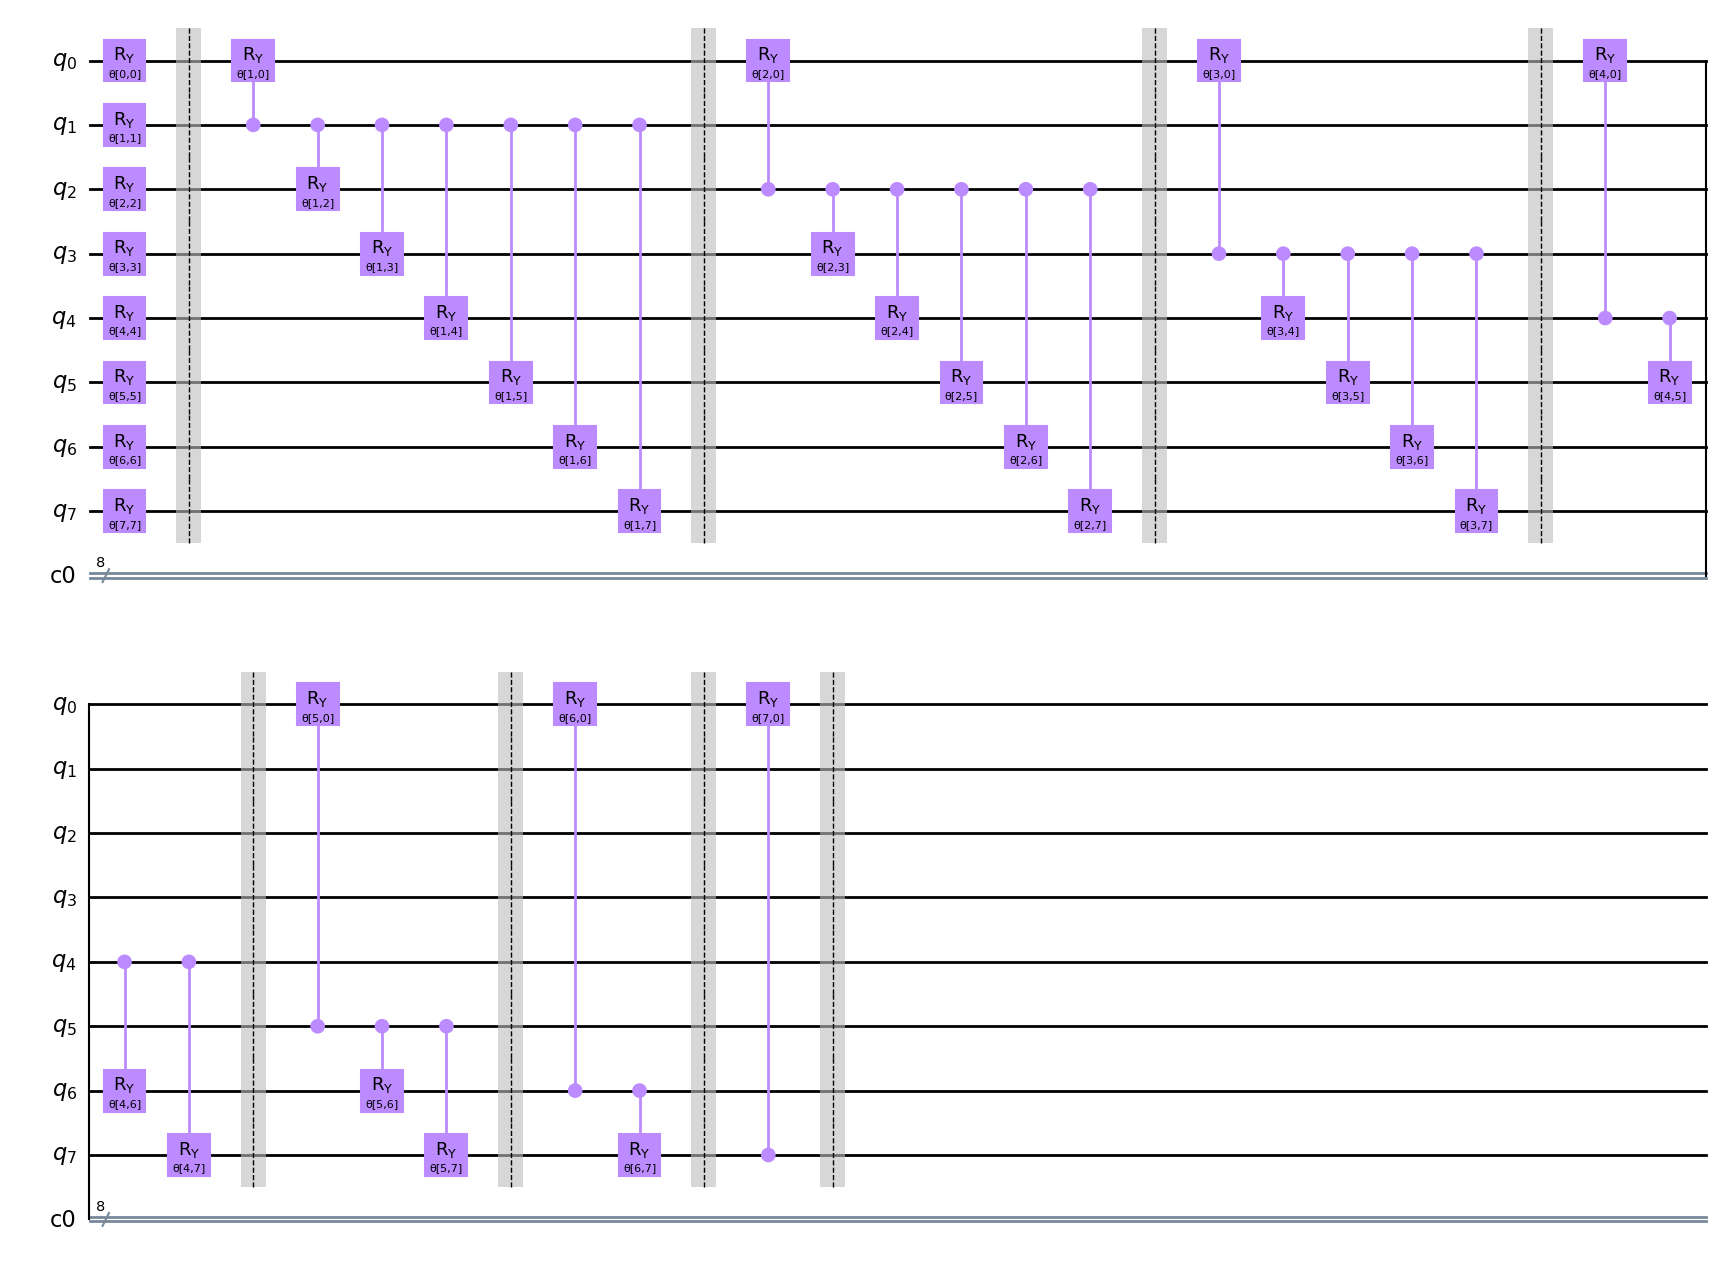

In [5]:
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit.circuit import Parameter

# Creating a Quantum Circuit with 8 qubits
circuit = QuantumCircuit(8)
cr = ClassicalRegister(8)
circuit.add_register(cr)

# Define a 2D parameter array for rotation angles
theta = [[Parameter(f'θ[{control},{target}]') for target in range(8)] for control in range(8)]

# Apply RY gates to each qubit with the parameter theta[control, control]
for qubit in range(8):
    circuit.ry(theta[qubit][qubit], qubit)

circuit.barrier()
control_qubit = 1
for target_qubit in range(8):
    if target_qubit != 1:
        circuit.cry(theta[control_qubit][target_qubit], control_qubit, target_qubit)

circuit.barrier()
control_qubit = 2
for target_qubit in range(8):
    if target_qubit != 2 and target_qubit != 1:  # Exclude 3-2 as it was already covered
        circuit.cry(theta[control_qubit][target_qubit], control_qubit, target_qubit)

circuit.barrier()
control_qubit = 3
for target_qubit in range(8):
    if target_qubit != 3 and target_qubit != 1 and target_qubit != 2:  # Exclude 4-2, 4-3 as they were already covered
        circuit.cry(theta[control_qubit][target_qubit], control_qubit, target_qubit)

circuit.barrier()

control_qubit = 4
for target_qubit in range(8):
    if target_qubit != 4 and target_qubit != 1 and target_qubit != 2 and target_qubit != 3:  # Exclude covered qubit pairs
        circuit.cry(theta[control_qubit][target_qubit], control_qubit, target_qubit)

circuit.barrier()

# Applying controlled-RY gates with parameters theta[control, target] for the sixth qubit
control_qubit = 5
for target_qubit in range(8):
    if target_qubit != 5 and target_qubit != 1 and target_qubit != 2 and target_qubit != 3 and target_qubit != 4:
        circuit.cry(theta[control_qubit][target_qubit], control_qubit, target_qubit)

circuit.barrier()

# Applying controlled-RY gates with parameters theta[control, target] for the seventh qubit
control_qubit = 6
for target_qubit in range(8):
    if target_qubit != 6 and target_qubit != 1 and target_qubit != 2 and target_qubit != 3 and target_qubit != 4 and target_qubit != 5:
        circuit.cry(theta[control_qubit][target_qubit], control_qubit, target_qubit)

circuit.barrier()

# Applying controlled-RY gates with parameters theta[control, target] for the eighth qubit
control_qubit = 7
for target_qubit in range(8):
    if target_qubit != 7 and target_qubit != 1 and target_qubit != 2 and target_qubit != 3 and target_qubit != 4 and target_qubit != 5 and target_qubit != 6:
        circuit.cry(theta[control_qubit][target_qubit], control_qubit, target_qubit)

circuit.barrier()

circuit.draw('mpl')